In [183]:
import numpy as np
import pandas as pd

In [184]:
df=pd.read_csv('Telco-Customer-Churn.csv')
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [185]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [186]:
df.shape
cols=df.columns
print(cols)
df.value_counts('Churn')

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


Churn
No     5174
Yes    1869
dtype: int64

In [187]:
#convert totalcharges to numeric and drop null values
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors='coerce')
df=df.dropna()

In [188]:
#datapreprocessing
#drop customer id
y=df['Churn']
df.drop('Churn',axis=1,inplace=True)
df.drop('customerID', axis = 1,inplace=True)
cols=df.columns
print(cols)
x=df
print(x)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')
      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
704

In [189]:
print(y)

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object


In [190]:
from sklearn.preprocessing import LabelEncoder
label_encoder_y=LabelEncoder()
y=label_encoder_y.fit_transform(y)
print(y)

[0 0 1 ... 0 1 0]


In [191]:
#encoding data
#x = df.iloc[:, :-1].values
from sklearn.preprocessing import LabelEncoder
label_encoder_x=LabelEncoder()
x.iloc[:,0]=label_encoder_x.fit_transform(x.iloc[:,0])
print(x)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0          0              0     Yes         No       1           No   
1          1              0      No         No      34          Yes   
2          1              0      No         No       2          Yes   
3          1              0      No         No      45           No   
4          0              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038       1              0     Yes        Yes      24          Yes   
7039       0              0     Yes        Yes      72          Yes   
7040       0              0     Yes        Yes      11           No   
7041       1              1     Yes         No       4          Yes   
7042       1              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1      

In [192]:
#convert to numeric
x.iloc[:,2]=label_encoder_x.fit_transform(x.iloc[:,2])
x.iloc[:,3]=label_encoder_x.fit_transform(x.iloc[:,3])
x.iloc[:,5]=label_encoder_x.fit_transform(x.iloc[:,5])
x.iloc[:,6]=label_encoder_x.fit_transform(x.iloc[:,6])
x.iloc[:,7]=label_encoder_x.fit_transform(x.iloc[:,7])
x.iloc[:,8]=label_encoder_x.fit_transform(x.iloc[:,8])
x.iloc[:,9]=label_encoder_x.fit_transform(x.iloc[:,9])
x.iloc[:,10]=label_encoder_x.fit_transform(x.iloc[:,10])
x.iloc[:,11]=label_encoder_x.fit_transform(x.iloc[:,11])
x.iloc[:,12]=label_encoder_x.fit_transform(x.iloc[:,12])
x.iloc[:,13]=label_encoder_x.fit_transform(x.iloc[:,13])
x.iloc[:,14]=label_encoder_x.fit_transform(x.iloc[:,14])
x.iloc[:,15]=label_encoder_x.fit_transform(x.iloc[:,15])
x.iloc[:,16]=label_encoder_x.fit_transform(x.iloc[:,16])

print(x)
print(y)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [193]:
#dummy encodng
x=df
one_hot_encoding_columns=["MultipleLines","InternetService","OnlineSecurity", "OnlineBackup","DeviceProtection" ,"TechSupport", "StreamingTV", "StreamingMovies","PaymentMethod","Contract"]
x=pd.get_dummies(x,columns=one_hot_encoding_columns)
print(x)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      PaperlessBilling  MonthlyCharges  TotalCharges  MultipleLines_0  ...  \
0                    1           

In [194]:
#to find null
x.isnull().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
PaperlessBilling      0
MonthlyCharges        0
TotalCharges          0
MultipleLines_0       0
MultipleLines_1       0
MultipleLines_2       0
InternetService_0     0
InternetService_1     0
InternetService_2     0
OnlineSecurity_0      0
OnlineSecurity_1      0
OnlineSecurity_2      0
OnlineBackup_0        0
OnlineBackup_1        0
OnlineBackup_2        0
DeviceProtection_0    0
DeviceProtection_1    0
DeviceProtection_2    0
TechSupport_0         0
TechSupport_1         0
TechSupport_2         0
StreamingTV_0         0
StreamingTV_1         0
StreamingTV_2         0
StreamingMovies_0     0
StreamingMovies_1     0
StreamingMovies_2     0
PaymentMethod_0       0
PaymentMethod_1       0
PaymentMethod_2       0
PaymentMethod_3       0
Contract_0            0
Contract_1            0
Contract_2            0
dtype: int64

In [195]:
#split data into training and testng
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [196]:
#minmax scaler
from sklearn.preprocessing import MinMaxScaler
st_x=MinMaxScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)
print("training")
print(x_train)
print("testing")
print(x_test)

training
[[0. 0. 1. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [1. 0. 1. ... 1. 0. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]]
testing
[[1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [1. 0. 0. ... 1. 0. 0.]
 [1. 1. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 1.]]


In [197]:
#fitting knn classifier
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [198]:
y_pred=classifier.predict(x_test)
print(y_pred)

[0 0 0 ... 1 0 0]


In [206]:
x.shape

(7032, 40)

In [199]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test,labels=classifier.classes_)
print(cm)

[[1111  216]
 [ 200  231]]


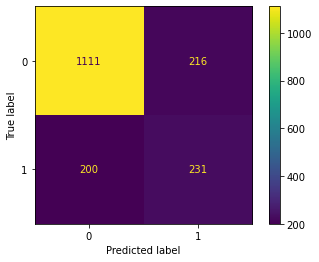

In [200]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()

In [201]:
training_score=classifier.score(x_train,y_train)
test_score=classifier.score(x_test,y_test)
print(training_score)
print(test_score)

0.8282138794084186
0.7633674630261661


In [203]:
K=[]
training=[]
test=[]
scores={}
for k in range(2,22):
    clf=KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train,y_train)
    training_score=clf.score(x_train,y_train)
    test_score=clf.score(x_test,y_test)
    K.append(k)
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
    

In [204]:
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.8581721653394009, 0.7559726962457338]
3 : [0.8558968524838833, 0.7417519908987485]
4 : [0.8386423966628744, 0.767349260523322]
5 : [0.8282138794084186, 0.7633674630261661]
6 : [0.8244216913158893, 0.7838452787258248]
7 : [0.820250284414107, 0.7696245733788396]
8 : [0.8179749715585893, 0.7861205915813424]
9 : [0.8122866894197952, 0.7775881683731513]
10 : [0.810580204778157, 0.7821387940841866]
11 : [0.8141827834660599, 0.7753128555176336]
12 : [0.8109594235874099, 0.7753128555176336]
13 : [0.8064087978763747, 0.7815699658703071]
14 : [0.8081152825180129, 0.7878270762229806]
15 : [0.8102009859689041, 0.7838452787258248]
16 : [0.8064087978763747, 0.7872582480091013]
17 : [0.8020477815699659, 0.7792946530147895]
18 : [0.801668562760713, 0.7861205915813424]
19 : [0.7973075464543041, 0.7810011376564278]
20 : [0.7992036405005688, 0.785551763367463]
21 : [0.7963594994311718, 0.7878270762229806]


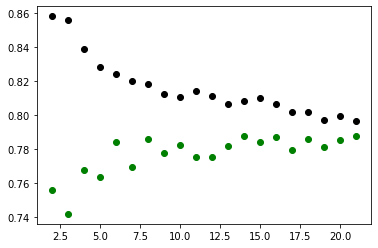

In [205]:
import matplotlib.pyplot as plt
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()